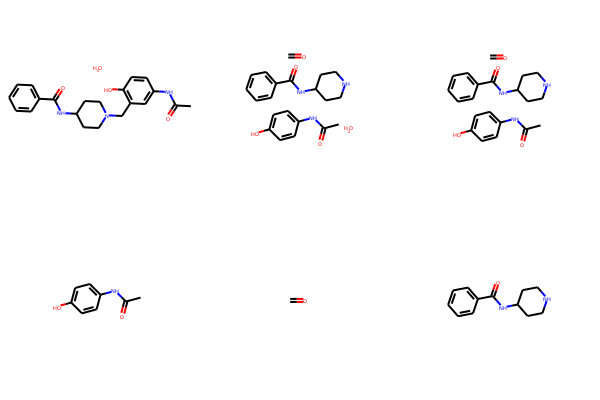

In [11]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

import psi4
import numpy as np


parent = Chem.MolFromSmiles('C(=O)(C)NC1=CC(=C(O)C=C1)CN1CCC(NC(=O)C2=CC=CC=C2)CC1.O')
mol1 = Chem.MolFromSmiles('O.Oc1ccc(NC(=O)C)cc1.C=O.O=C(NC1CCNCC1)c1ccccc1')
mol2 = Chem.MolFromSmiles('Oc1ccc(NC(=O)C)cc1.C=O.O=C(NC1CCNCC1)c1ccccc1')
mol3 = Chem.MolFromSmiles('Oc1ccc(NC(=O)C)cc1')
mol4 = Chem.MolFromSmiles('O=C')
mol5 = Chem.MolFromSmiles('O=C(NC1CCNCC1)c1ccccc1')
Draw.MolsToGridImage([parent, mol1, mol2, mol3, mol4, mol5])

In [12]:
def mol2xyz(mol):
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
    AllChem.UFFOptimizeMolecule(mol)
    atoms = mol.GetAtoms()
    string = "\n"
    for i, atom in enumerate(atoms):
        pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
        string += "{} {} {} {}\n".format(atom.GetSymbol(), pos.x, pos.y, pos.z)
    string += "units angstrom\n"
    return string, mol


In [14]:
xyz, mol=mol2xyz(mol1)
psi4.set_memory('4 GB')
psi4.set_num_threads(4)

In [15]:
benz = psi4.geometry(xyz)

In [ ]:
%time scf_e, scf_wfn = psi4.energy("B3LYP/cc-pVDZ", return_wfn=True)